# Projeto Eletromagnetismo e Ondulatória

# Freio Magnético

## Modelagem:

<img src="modelo.png" width="650">

In [159]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Constantes

In [160]:
# CONSTANTES:
conductivity_aluminium=3.3*(10**7)
resistivity_aluminium = 1/conductivity_aluminium
#massa do disco
m=0.51
#Volume
#S= math.pi * 0.04**2
S= 2.5*2e-4
d = 8e-3
V= S*d
#distancia do centro do disco até o campo magnetico
R=8.2/100
# w inicial
w=400
# Momento de inercia de um disco (para calcular a aceleração a partir do torque)
I = m*R**2

### Formulas
Para os calculos, foi utilizado as formulas desse artigo: https://www.researchgate.net/publication/265088196_Braking_Torque_Analysis_On_Electromagnetic_Braking_Study_Using_Eddy_Current_For_Brake_Disc_Of_Al6061_And_Al7075

In [161]:
#Campo magnetico
#B=u0*n*i/Ig
B= 0.3

# Densidade da corrente
J= conductivity_aluminium*(R*w*B)

# Potencia dissipada
Pd= resistivity_aluminium*(J**2)*V

# Torque de frenagem (Tb)
Tb= Pd/w

# aceleração angular
a_angular = Tb/I

## Simulação

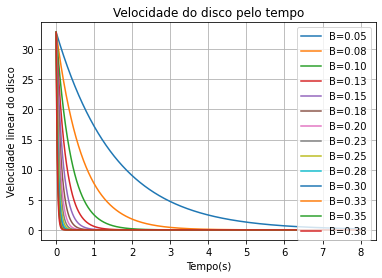

In [162]:
#POR ODEINT

#lista tempo
delta_t=1e-3
listatempo= np.arange(0,8,delta_t)
#implementando a função EquacoesDiferenciais
def calcula_aceleracao(condicao_inicial,t,B):
    w= condicao_inicial
    J= conductivity_aluminium*(R*w*B)
    Pd= resistivity_aluminium*(J**2)*V
    Tb= Pd/w
    a_angular= Tb/I
    dwdt= -a_angular
    return dwdt

lista_B = np.arange(0.05, 0.4, 0.025)
for Bs in lista_B:
    Solucao= odeint(calcula_aceleracao, w, listatempo,args=(Bs,))
    velocidade = Solucao*R
    plt.plot(listatempo, velocidade,label='B={0:.2f}'.format(Bs))

plt.title("Velocidade do disco pelo tempo")
plt.xlabel("Tempo(s)")
plt.ylabel("Velocidade linear do disco")
plt.legend()
plt.grid(True)
plt.show()